In [1]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
import pickle
import numpy as np
import os
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = open("/content/drive/MyDrive/text_prediction_model/Les_Miserables-Victor_Hugo.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[1645:1750]


"All I need is a quiet corner somewhere. After dinner 'You can't eat here either,' the innkeeper interrupt"

In [4]:
len(data)

165909

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('/content/drive/MyDrive/text_prediction_model/token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[313, 38, 73, 26, 38, 107, 10, 1856, 1101, 60, 390, 119, 1377, 6, 27]

In [6]:
len(sequence_data)

30927

In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2923


In [8]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  30924


array([[ 313,   38,   73,   26],
       [  38,   73,   26,   38],
       [  73,   26,   38,  107],
       [  26,   38,  107,   10],
       [  38,  107,   10, 1856],
       [ 107,   10, 1856, 1101],
       [  10, 1856, 1101,   60],
       [1856, 1101,   60,  390],
       [1101,   60,  390,  119],
       [  60,  390,  119, 1377]])

In [9]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])
y = to_categorical(y, num_classes=vocab_size)
y[:5]

Data:  [[ 313   38   73]
 [  38   73   26]
 [  73   26   38]
 [  26   38  107]
 [  38  107   10]
 [ 107   10 1856]
 [  10 1856 1101]
 [1856 1101   60]
 [1101   60  390]
 [  60  390  119]]
Response:  [  26   38  107   10 1856 1101   60  390  119 1377]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(f"number of training data samples: {len(y_train)} , number of testing data samples: {len(y_test)}")

number of training data samples: 27831 , number of testing data samples: 3093


In [12]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             29230     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2923)              2925923   
                                                                 
Total params: 16004153 (61.05 MB)
Trainable params: 16004153 (61.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("/content/drive/MyDrive/text_prediction_model/next_words_splitted.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(metrics=['accuracy'],loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
history=model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint])

Epoch 1/150
484/484 [==============================] - ETA: 0s - loss: 6.3868 - accuracy: 0.0561
Epoch 1: loss improved from inf to 6.38676, saving model to /content/drive/MyDrive/text_prediction_model/next_words_splitted.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


484/484 [==============================] - 19s 26ms/step - loss: 6.3868 - accuracy: 0.0561
Epoch 2/150
482/484 [============================>.] - ETA: 0s - loss: 5.9213 - accuracy: 0.0687
Epoch 2: loss improved from 6.38676 to 5.92173, saving model to /content/drive/MyDrive/text_prediction_model/next_words_splitted.h5
484/484 [==============================] - 8s 17ms/step - loss: 5.9217 - accuracy: 0.0687
Epoch 3/150
484/484 [==============================] - ETA: 0s - loss: 5.6227 - accuracy: 0.0836
Epoch 3: loss improved from 5.92173 to 5.62268, saving model to /content/drive/MyDrive/text_prediction_model/next_words_splitted.h5
484/484 [==============================] - 9s 18ms/step - loss: 5.6227 - accuracy: 0.0836
Epoch 4/150
484/484 [==============================] - ETA: 0s - loss: 5.2901 - accuracy: 0.1089
Epoch 4: loss improved from 5.62268 to 5.29010, saving model to /content/drive/MyDrive/text_prediction_model/next_words_splitted.h5
484/484 [==============================] -

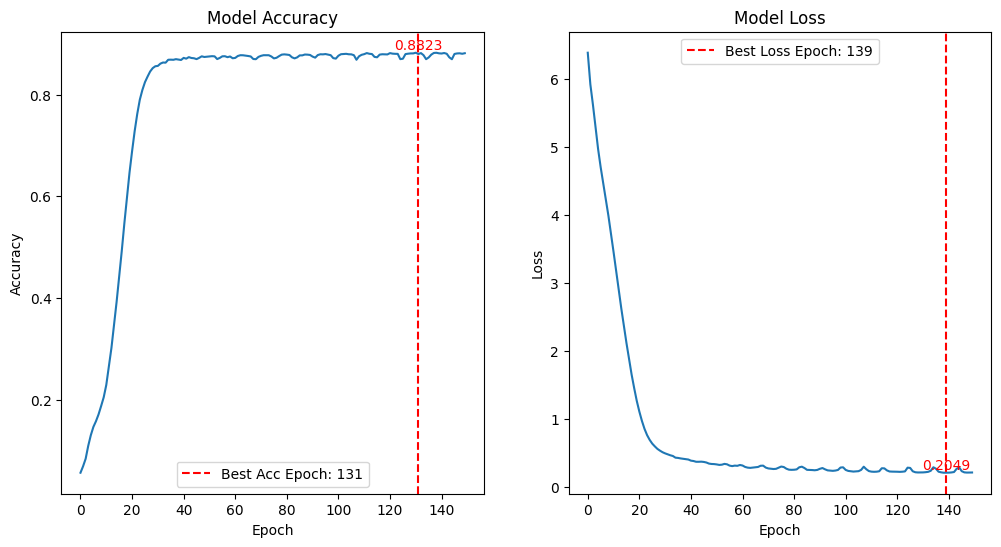

In [14]:
import matplotlib.pyplot as plt

# Find the epoch with the best validation accuracy
best_acc_epoch = history.history['accuracy'].index(max(history.history['accuracy'])) + 1  # Adding 1 since epochs are 1-indexed
best_acc_value = max(history.history['accuracy'])

# Find the epoch with the best validation loss
best_loss_epoch = history.history['loss'].index(min(history.history['loss'])) + 1  # Adding 1 since epochs are 1-indexed
best_loss_value = min(history.history['loss'])

# Plotting the training history
plt.figure(figsize=(12, 6))

# Plot training accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.axvline(x=best_acc_epoch, color='r', linestyle='--', label=f'Best Acc Epoch: {best_acc_epoch}')
plt.text(best_acc_epoch, best_acc_value, f'{best_acc_value:.4f}', ha='center', va='bottom', color='r')
plt.legend()

# Plot training loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.axvline(x=best_loss_epoch, color='r', linestyle='--', label=f'Best Loss Epoch: {best_loss_epoch}')
plt.text(best_loss_epoch, best_loss_value, f'{best_loss_value:.4f}', ha='center', va='bottom', color='r')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('/content/drive/MyDrive/text_prediction_model/next_words_splitted.h5')
tokenizer = pickle.load(open('/content/drive/MyDrive/text_prediction_model/token.pkl', 'rb'))

In [22]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert one-hot encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Convert probability predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Print the evaluation results
print("Accuracy:", accuracy)

97/97 [==============================] - 1s 5ms/step
Accuracy: 0.9043000323310701


In [19]:
print(y_test[:10])
print(y_pred[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[5.7383657e-17 2.6291311e-09 6.6533595e-13 ... 2.3473307e-20
  4.5887731e-20 6.7710060e-22]
 [2.3338775e-16 6.4281903e-06 5.4717443e-08 ... 5.5549976e-19
  1.6126905e-20 2.6600554e-19]
 [2.1858378e-11 1.3261940e-03 1.9901752e-07 ... 9.6747773e-13
  3.5136163e-13 8.4934246e-13]
 ...
 [0.0000000e+00 1.0000000e+00 4.9491785e-35 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.1950840e-26 8.2228705e-15 1.4045721e-25 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.8791878e-12 1.0619072e-07 2.0237680e-07 ... 2.8634640e-16
  2.6794154e-17 1.7979861e-13]]


In [23]:
def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  return predicted_word

In [24]:
while(True):
  text = input("Enter your Text: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          text=" ".join(text)
          print(f"last 3 words are: {text} ")


          print(f"predicted word is: {Predict_Next_Words(model, tokenizer, text)} ")

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your Text: mad with grief at losing
last 3 words are: grief at losing 
1/1 [==============================] - 0s 91ms/step
predicted word is: cosette 
Enter your Text: His anger and misery of
last 3 words are: and misery of 
1/1 [==============================] - 0s 21ms/step
predicted word is: minutes 
Enter your Text: Standing beside her on the
last 3 words are: her on the 
1/1 [==============================] - 0s 19ms/step
predicted word is: bench 
Enter your Text: Valjean told him everything about his
last 3 words are: everything about his 
1/1 [==============================] - 0s 28ms/step
predicted word is: life 
Enter your Text: 0
Execution completed.....
